# Imports

Opening raw data file ..\data\raw\closed_7_raw.fif...
Isotrak not found
    Range : 0 ... 5796 =      0.000 ...    22.641 secs
Ready.
Reading 0 ... 5796  =      0.000 ...    22.641 secs...
Filtering raw data in 1 contiguous segment
Setting up low-pass filter at 60 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 60.00 Hz
- Upper transition bandwidth: 15.00 Hz (-6 dB cutoff frequency: 67.50 Hz)
- Filter length: 57 samples (0.223 s)

Setting 117 of 5797 (2.02%) samples to NaN, retaining 5680 (97.98%) samples.
Setting up low-pass filter at 4 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband ed

c:\Users\cscrawford\Documents\node_apps\neurosity\crown-mne\scripts\htil_eeg.py:129: RuntimeWarning: The epochs you passed to ICA.fit() were baseline-corrected. However, we suggest to fit ICA only on data that has been high-pass filtered, but NOT baseline-corrected.
  ica.fit(epochs)
c:\Users\cscrawford\Documents\node_apps\neurosity\crown-mne\scripts\htil_eeg.py:136: RuntimeWarning: The data you passed to ICA.apply() was baseline-corrected. Please note that ICA can introduce DC shifts, therefore you may wish to consider baseline-correcting the cleaned data again.
  ica.apply(epochs.load_data())


Using data from preloaded Raw for 20 events and 385 original time points ...


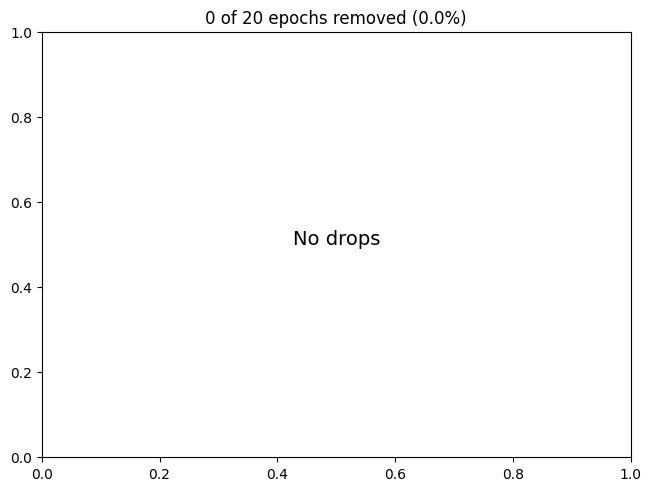

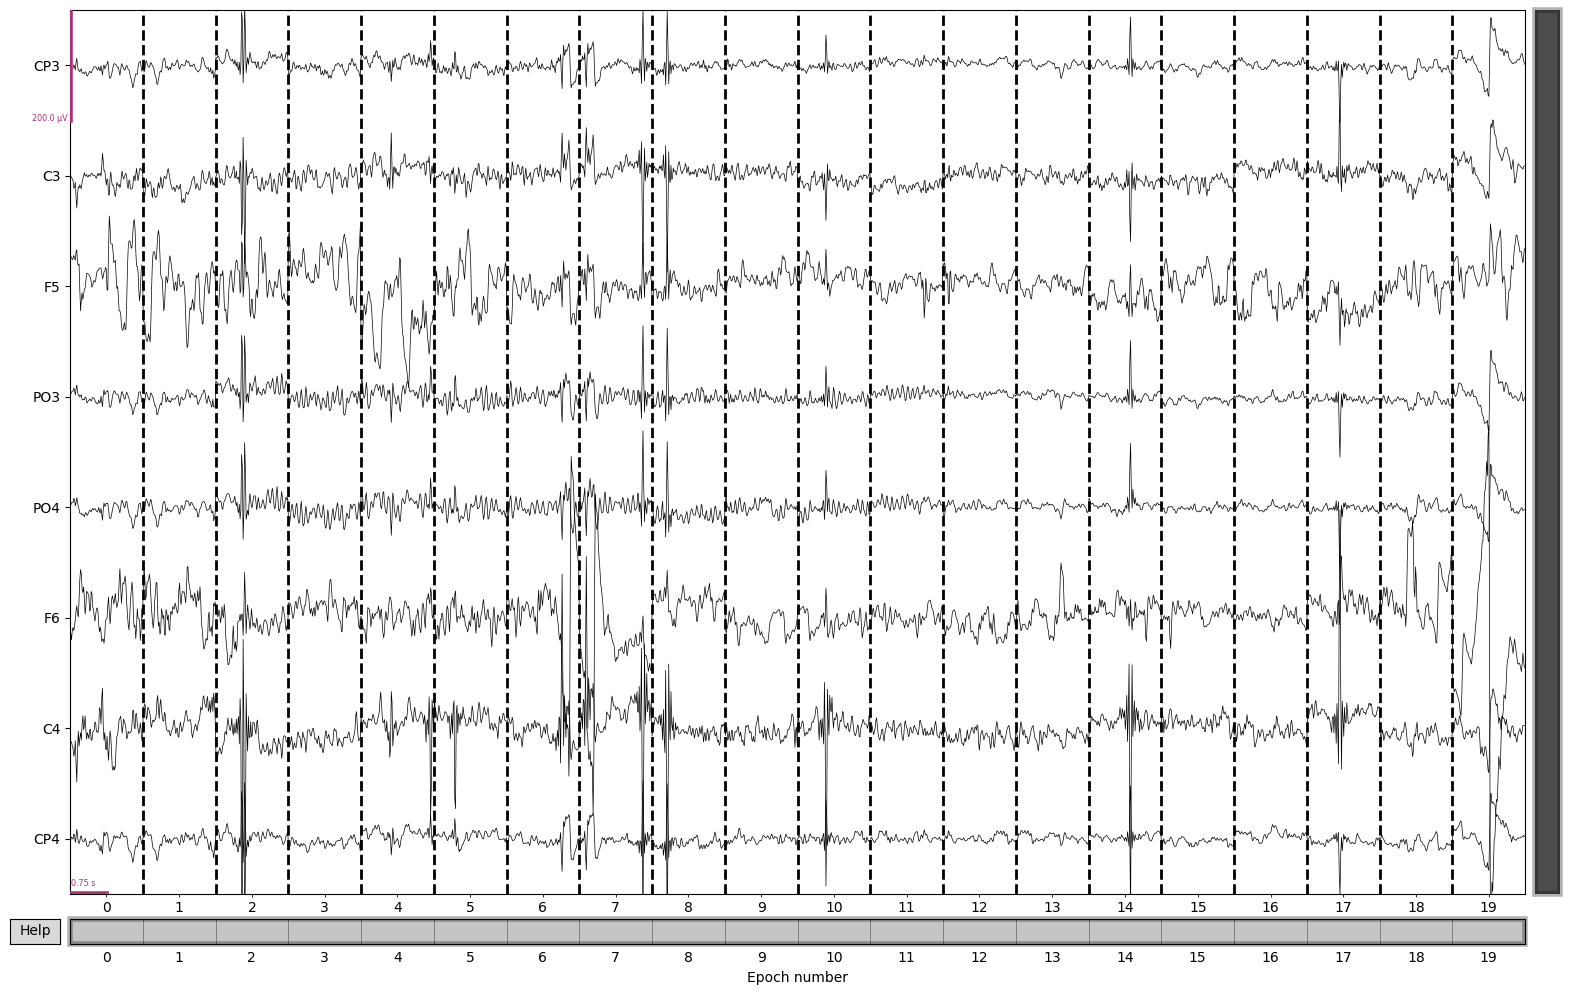

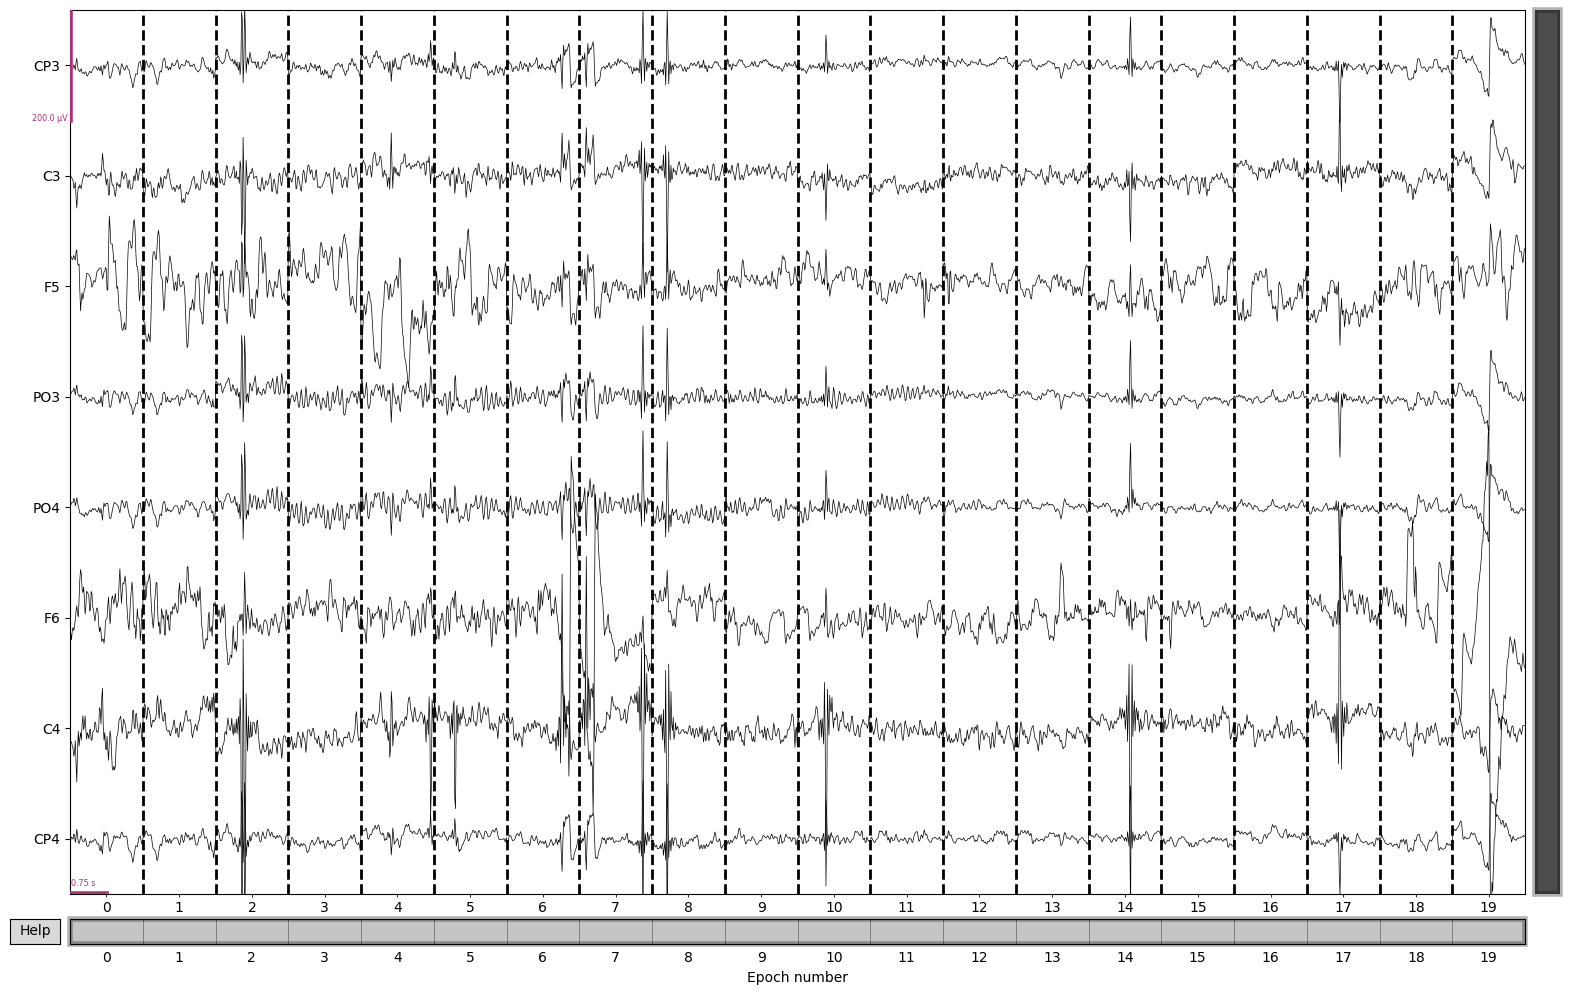

In [202]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import ShuffleSplit, cross_val_score
from sklearn.pipeline import Pipeline
import pandas as pd
import seaborn as sns


from mne import Epochs, pick_types
from mne.channels import make_standard_montage
from mne.datasets import eegbci
from mne.decoding import CSP
from mne.io import concatenate_raws, read_raw_edf

from htil_eeg import HTIL_EEG 
from brainflow import BoardIds

h_eeg = HTIL_EEG(BoardIds.CROWN_BOARD, real_time=False, z_score_threshold=2.0)

'''
raw_file_path = "left_right_2"
events_file_path = "left_right_2"

event_dict = {"left": 1, "right": 2, "rest": 3}
events_colors =  {1:"green", "green":2, "blue": 3}
l_freq=2
h_freq=20
show_muscle_artifacts=False
epochs = h_eeg.raw_events_to_epochs(f"../data/raw/{raw_file_path}_raw.fif", f"../data/events/{events_file_path}_events.csv", event_dict, events_colors, l_freq=l_freq, h_freq=h_freq, show_muscle_artifacts=show_muscle_artifacts)
'''

'''
raw_file_path = "open_6"
events_file_path = "open_6"

event_dict = {"open": 1}
events_colors =  {1:"green"}
l_freq=2
h_freq=20
show_muscle_artifacts=False
epochs_open = h_eeg.raw_events_to_epochs(f"../data/raw/{raw_file_path}_raw.fif", f"../data/events/{events_file_path}_events.csv", event_dict, events_colors, l_freq=l_freq, h_freq=h_freq, show_muscle_artifacts=show_muscle_artifacts)
'''


raw_file_path = "closed_7"
events_file_path = "closed_7"

event_dict = {"closed": 1}
events_colors =  {1:"green"}
l_freq=2
h_freq=20
show_muscle_artifacts=False
epochs = h_eeg.raw_events_to_epochs(f"../data/raw/{raw_file_path}_raw.fif", f"../data/events/{events_file_path}_events.csv", event_dict, events_colors, l_freq=l_freq, h_freq=h_freq, show_muscle_artifacts=show_muscle_artifacts)

# Epochs Viewer

You seem to have overlapping epochs. Some event lines may be duplicated in the plot.


<Figure size 640x480 with 0 Axes>

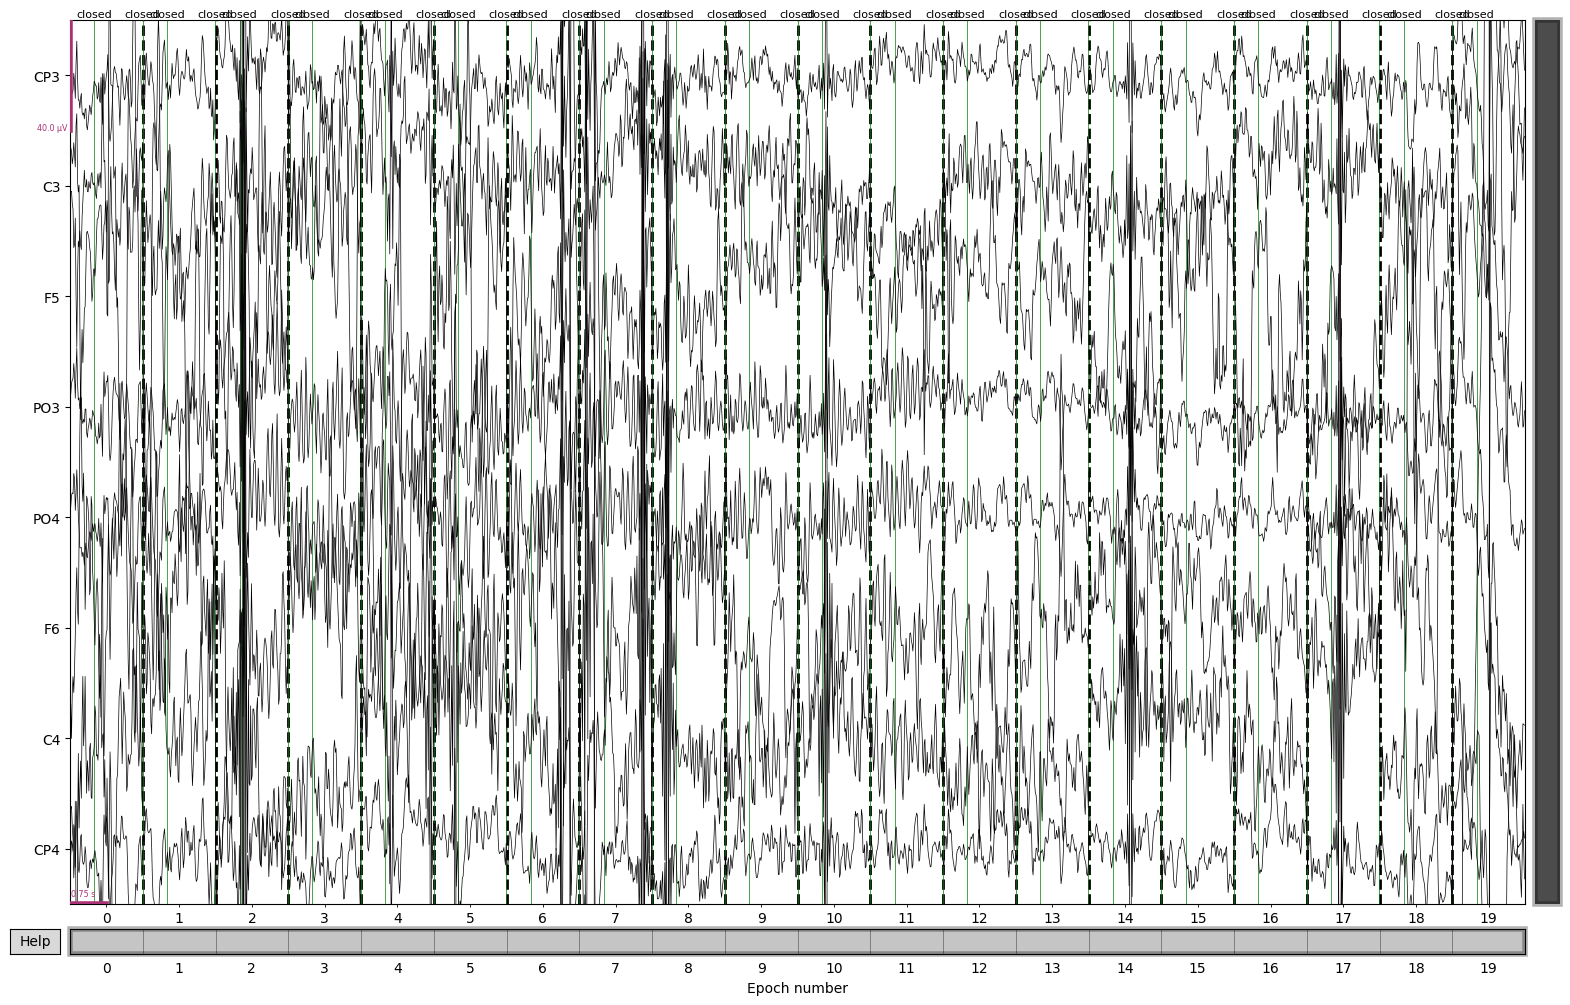

In [197]:
plt.clf()
events_colors =  {1:"green", 2: "red", 3: "blue"}
epochs.plot(event_id=True, events=True, event_color=events_colors)
plt.show()

# PSD 

    Using multitaper spectrum estimation with 7 DPSS windows
Plotting power spectral density (dB=True).
Averaging across epochs before plotting...


c:\Users\cscrawford\AppData\Local\anaconda3\envs\crown-mne\Lib\site-packages\mne\viz\utils.py:158: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  (fig or plt).show(**kwargs)


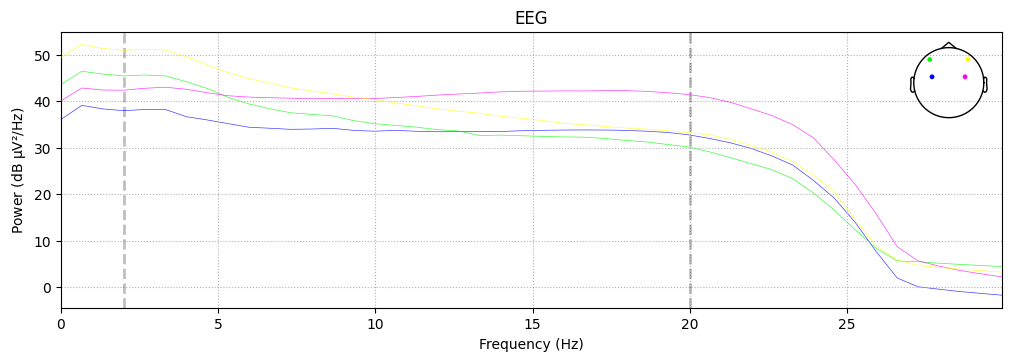

In [199]:


def plot():
    epochs['closed'].compute_psd(fmax=30).plot(picks=["C3","C4", "F5", "F6"])
    plt.show()

plot()

# Time Frequency

rest
Applying baseline correction (mode: logratio)


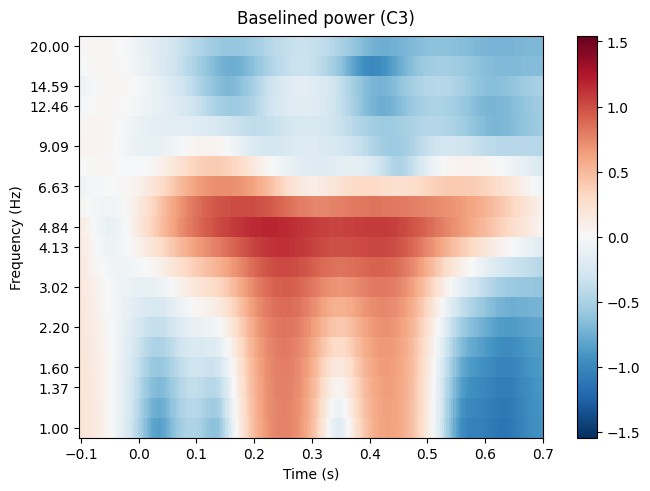

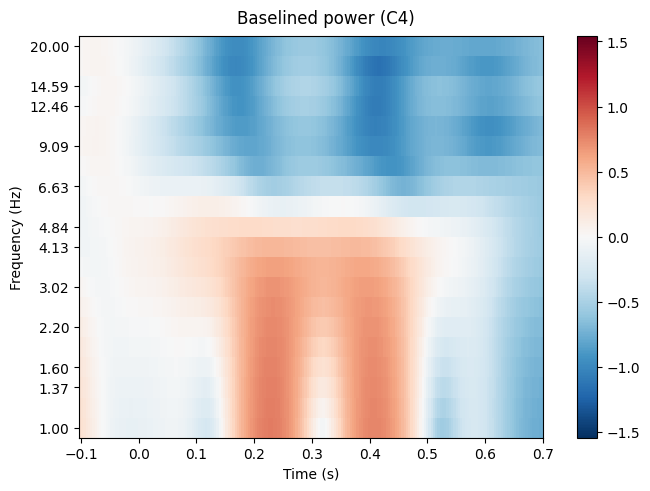

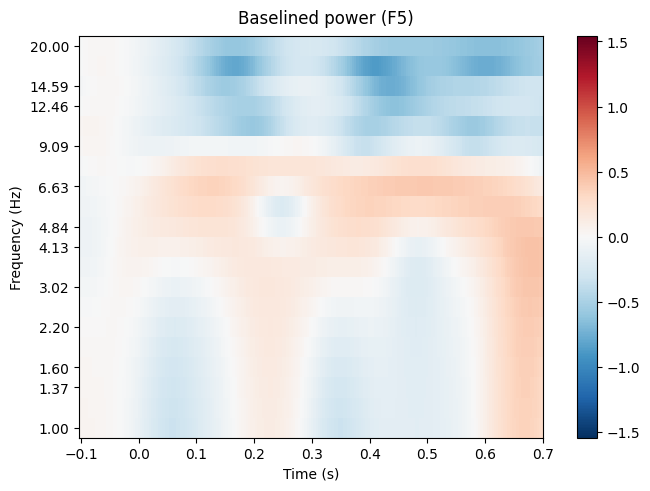

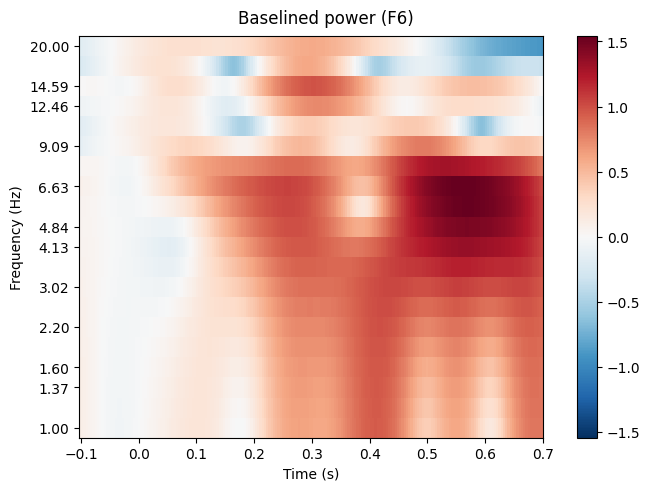

left
Applying baseline correction (mode: logratio)


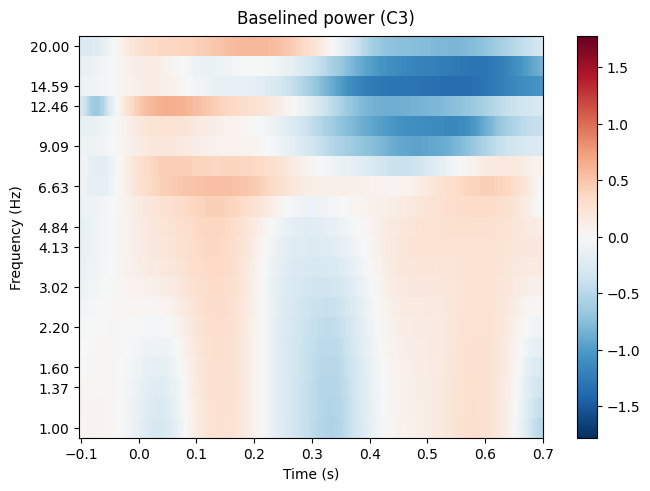

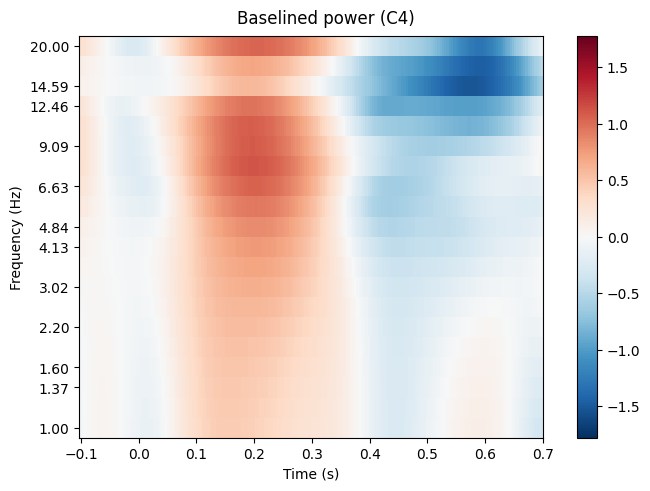

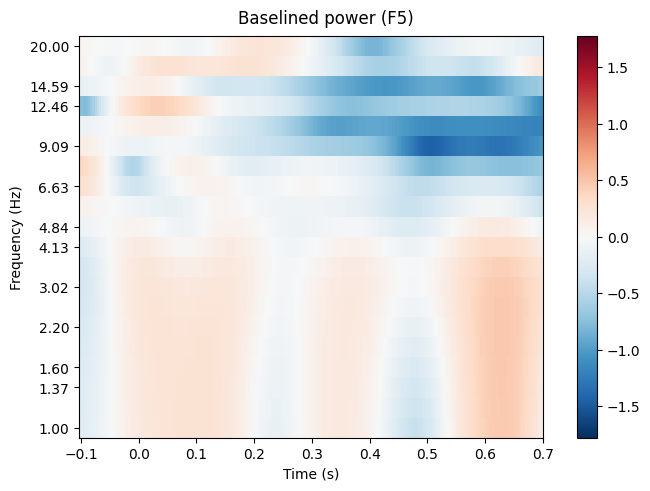

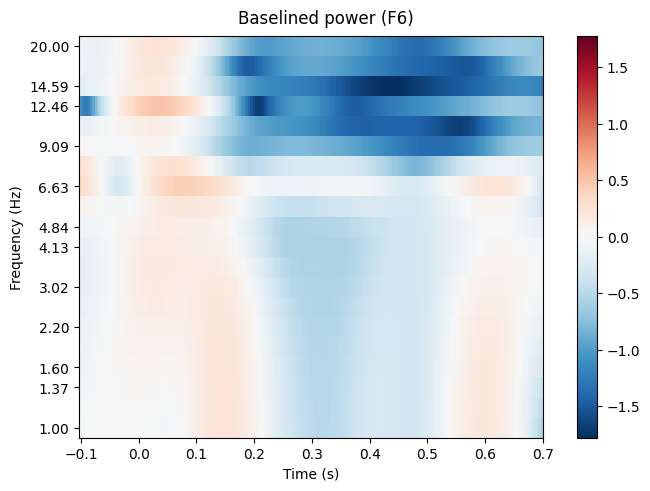

right
Applying baseline correction (mode: logratio)


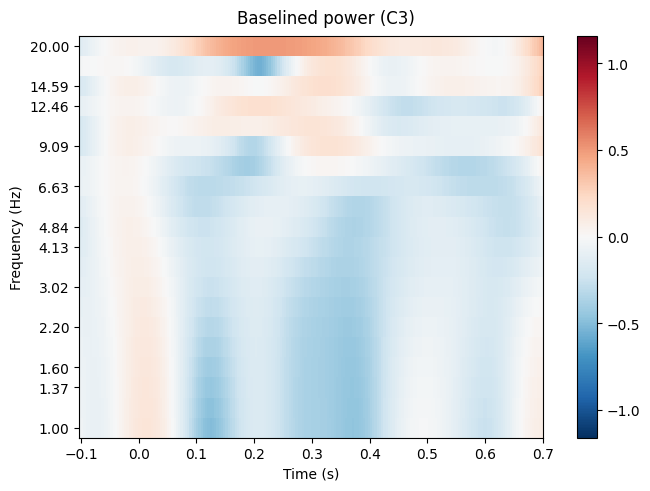

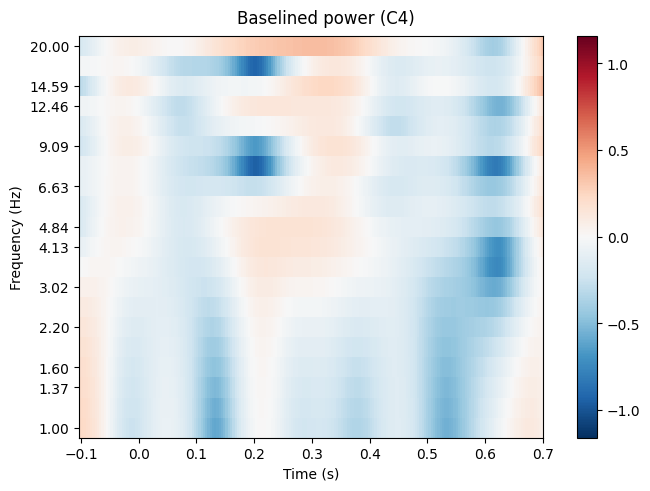

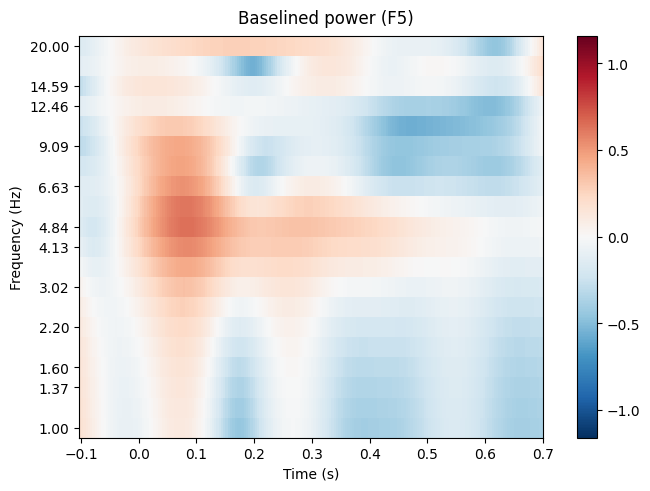

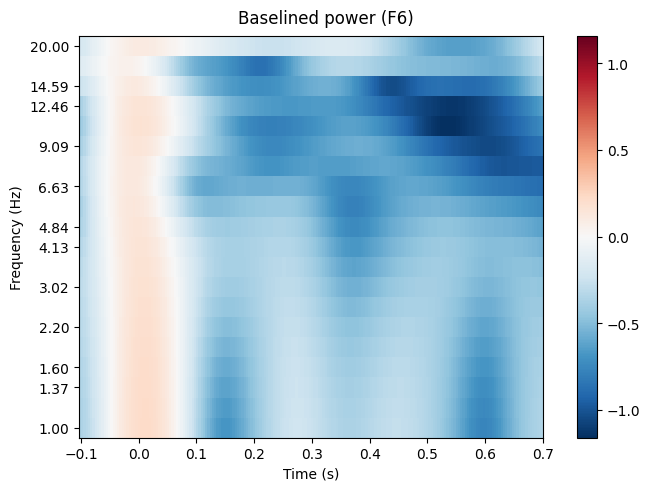

[<Figure size 640x480 with 2 Axes>,
 <Figure size 640x480 with 2 Axes>,
 <Figure size 640x480 with 2 Axes>,
 <Figure size 640x480 with 2 Axes>]

In [191]:
freqs = np.logspace(*np.log10([1, 20]), num=20)
n_cycles = freqs / 2.0
baseline = (-0.1, 0)

print("rest")
epochs_tfr_rest = epochs["rest"].compute_tfr("morlet", n_cycles=n_cycles, return_itc=False, freqs=freqs, average=True, use_fft=True)
epochs_tfr_rest.crop(-0.1, 0.7)
epochs_tfr_rest.plot(title="auto", picks=["C3", "C4", "F5", "F6"], baseline=baseline, mode="logratio") # vmax=1e-8,


print("left")
epochs_tfr_left = epochs["left"].compute_tfr("morlet", n_cycles=n_cycles, return_itc=False, freqs=freqs, average=True, use_fft=True)
epochs_tfr_left.crop(-0.1, 0.7)
epochs_tfr_left.plot(title="auto", picks=["C3", "C4", "F5", "F6"], baseline=baseline, mode="logratio") # vmax=1e-8,


print("right")
epochs_tfr_right = epochs["right"].compute_tfr("morlet", n_cycles=n_cycles, return_itc=False, freqs=freqs, average=True, use_fft=True)
epochs_tfr_right.crop(-0.1, 0.7)
epochs_tfr_right.plot(title="auto", picks=["C3", "C4", "F5", "F6"], baseline=baseline, mode="logratio") # vmax=1e-8,




# Joint Plot

Applying baseline correction (mode: mean)
Applying baseline correction (mode: mean)
Applying baseline correction (mode: mean)
Applying baseline correction (mode: mean)


<Figure size 640x480 with 0 Axes>

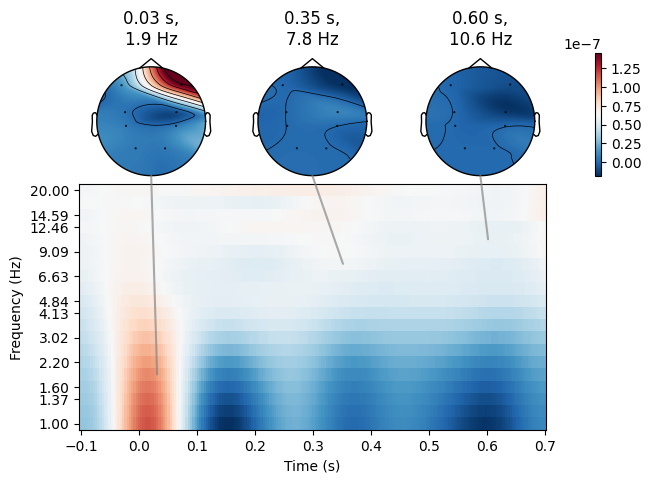

'\nplt.clf()\nepochs_tfr_rest.plot_joint(picks=[\'F6\', "C3", "C4", "F5"], timefreqs=((0.05, 2), (0.35, 8), (0.6, target_freq)),  baseline=baseline)\nplt.show()\n'

In [203]:
target_freq = 11
#plt.clf()
#epochs_tfr_left.plot_joint(picks=['F6', "C3", "C4", "F5", "CP3", "PO4", "CP4", "PO3"], timefreqs=((0.05, 8), (0.35, 8), (0.6, target_freq)),  baseline=baseline)
#plt.show()


plt.clf()
epochs_tfr_right.plot_joint(picks=['F6', "C3", "C4", "F5"], timefreqs=((0.03, 2), (0.35, 8), (0.6, target_freq)),  baseline=baseline)
plt.show()


'''
plt.clf()
epochs_tfr_rest.plot_joint(picks=['F6', "C3", "C4", "F5"], timefreqs=((0.05, 2), (0.35, 8), (0.6, target_freq)),  baseline=baseline)
plt.show()
'''

In [204]:
plt.clf()
epochs["left"].plot_image()
plt.show()

KeyError: 'Event name "left" could not be found. The following events are present in the data: closed'

<Figure size 640x480 with 0 Axes>

# Topomap

No baseline correction applied


<Figure size 640x480 with 0 Axes>

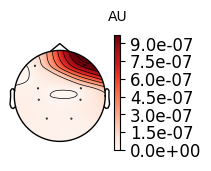

In [205]:
plt.clf()
epochs_tfr_left.plot_topomap()
plt.show()

# Frequency Compare

    Using multitaper spectrum estimation with 7 DPSS windows
shape (22, 8, 44)
    Using multitaper spectrum estimation with 7 DPSS windows
shape (13, 8, 44)
    Using multitaper spectrum estimation with 7 DPSS windows
shape (11, 8, 44)


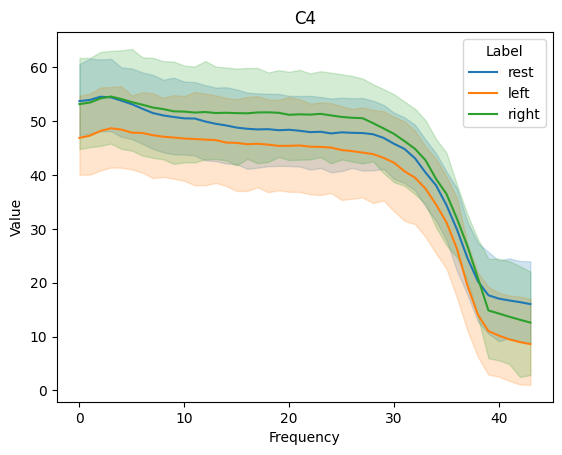

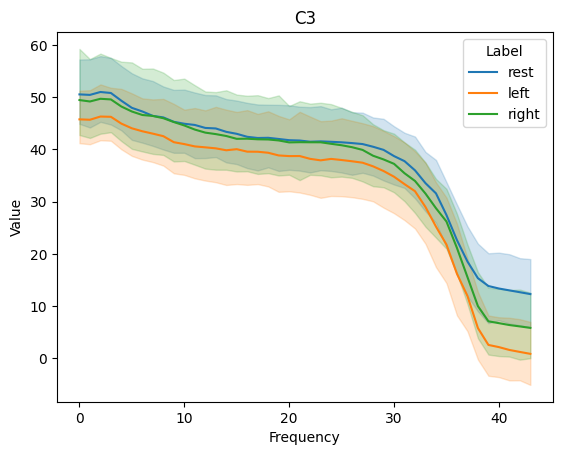

In [173]:
#df_open = h_eeg.epochs_to_dataframe(epochs["open"], "open", freq_max=30)
rest = h_eeg.epochs_to_dataframe(epochs["rest"], "rest", freq_max=30)
left = h_eeg.epochs_to_dataframe(epochs["left"], "left", freq_max=30)
right = h_eeg.epochs_to_dataframe(epochs["right"], "right", freq_max=30)


#df_open = h_eeg.epochs_to_dataframe(epochs_open["open"], "open", freq_max=30)
combined_df = pd.concat([rest, left, right], ignore_index=True)

channel_a = "C4"
channel_b = "C3"
c4 = combined_df[combined_df['Channel'].isin([channel_a])]
c3 = combined_df[combined_df['Channel'].isin([channel_b])]

plt.clf()
sns.lineplot(data=c4, x="Frequency", y="Value", hue="Label").set(title=channel_a)
plt.show()


plt.clf()
sns.lineplot(data=c3, x="Frequency", y="Value", hue="Label").set(title=channel_b)
plt.show()
